<a href="https://colab.research.google.com/github/Saibot19/7506R-1C2023-GRUPO21/blob/main/7506R_TP2_GRUPO21_CHP1_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importaciones

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis
from google.colab import drive
import joblib

#modelos y métricas
from xgboost import XGBClassifier
import xgboost as xgb
import sklearn as sk
from sklearn import tree
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score, make_scorer#, precision_recall_curve, roc_curve,
from sklearn.metrics import confusion_matrix, classification_report
#preprocesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV

from sklearn.tree import export_text

import nltk
from nltk import tokenize
# Descargamos las stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

# Importamos el interfaz SnowballStemmer que tiene versión en Español para las derivaciones de palabras
from nltk.stem import SnowballStemmer

import tensorflow as tf
from tensorflow import keras
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import StandardScaler
from keras.wrappers.scikit_learn import KerasClassifier,KerasRegressor
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MaxAbsScaler
import scipy
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer


drive.mount('/content/drive', force_remount=True)
df = pd.read_csv("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_2/Datasets/train.csv")
df_test = pd.read_csv("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_2/Datasets/test.csv")

df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Mounted at /content/drive


,ID,review_es,sentimiento
0,0,Uno de los otros críticos ha mencionado que de...,positivo
1,1,Una pequeña pequeña producción.La técnica de f...,positivo
2,2,Pensé que esta era una manera maravillosa de p...,positivo
3,3,"Básicamente, hay una familia donde un niño peq...",negativo
4,4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo
...,...,...,...
49995,49995,Pensé que esta película hizo un buen trabajo a...,positivo
49996,49996,"Mala parcela, mal diálogo, mala actuación, dir...",negativo
49997,49997,Soy católica enseñada en escuelas primarias pa...,negativo
49998,49998,Voy a tener que estar en desacuerdo con el com...,negativo


## Preprocesamiento

Hacemos que el setimiento sea True si es positivo y False si es negativo para poder correr los modelos

In [ ]:
df['sentimiento'] = df['sentimiento'] == "positivo"
df

,ID,review_es,sentimiento
0,0,Uno de los otros críticos ha mencionado que de...,True
1,1,Una pequeña pequeña producción.La técnica de f...,True
2,2,Pensé que esta era una manera maravillosa de p...,True
3,3,"Básicamente, hay una familia donde un niño peq...",False
4,4,"El ""amor en el tiempo"" de Petter Mattei es una...",True
...,...,...,...
49995,49995,Pensé que esta película hizo un buen trabajo a...,True
49996,49996,"Mala parcela, mal diálogo, mala actuación, dir...",False
49997,49997,Soy católica enseñada en escuelas primarias pa...,False
49998,49998,Voy a tener que estar en desacuerdo con el com...,False


In [ ]:
stop_words_sp = set(stopwords.words('english'))
print(stop_words_sp)

{'his', 'at', 'that', 'until', 'most', 's', 'wouldn', 'too', 'same', 'into', 'how', "hasn't", 'an', 'again', 'in', 'very', 'up', 'nor', "you'll", 'off', 'wasn', "weren't", 'further', 'while', 'when', 'other', 'has', 'are', "you'd", 'ourselves', 'more', "couldn't", 'ma', "haven't", 'by', 'whom', 'were', "didn't", 'it', 'what', 'during', 'm', "hadn't", 'our', 'these', 'am', 'shouldn', "shan't", 'had', 'all', 'i', 'if', 't', 'why', 'of', 're', 'been', 'y', 'being', 'just', 'doesn', 'll', 'only', 'but', 'can', "she's", 'did', 'him', 'from', 'will', 'its', 'we', 'there', 'weren', 'me', "won't", 'such', 'shan', 'yourselves', 'does', 'some', 'yours', 'few', 'hers', 'itself', 'mightn', 'as', 'is', 'isn', 'haven', 'now', 'for', 'having', 'not', 'under', 'against', 'both', 'd', 'between', 'then', "aren't", 'you', 'herself', 'so', 'be', "wasn't", 'because', "it's", "shouldn't", 'themselves', 'was', 'their', 'couldn', 'above', 'a', 'through', 'needn', 'doing', 'to', 'about', "mustn't", 've', 'thei

Revisamos los stop_words que tenemos en español

In [ ]:
stop_words_sp = set(stopwords.words('spanish'))
print(stop_words_sp)

{'vosotros', 'estuviera', 'estuviese', 'yo', 'tengas', 'seríamos', 'eran', 'habrá', 'tengamos', 'otro', 'habréis', 'tuviera', 'has', 'sentidas', 'tendríais', 'habremos', 'son', 'estados', 'esto', 'nuestros', 'sin', 'estuvieron', 'se', 'fuesen', 'suyas', 'hemos', 'al', 'habríamos', 'le', 'hasta', 'tuviésemos', 'tuyo', 'ni', 'nos', 'la', 'nosotros', 'teníais', 'tenías', 'suyo', 'hubieran', 'fueses', 'fuiste', 'tú', 'ellos', 'hube', 'seas', 'estás', 'vuestra', 'tenidas', 'es', 'tuvisteis', 'tiene', 'sus', 'tuviesen', 'teníamos', 'estaba', 'un', 'habían', 'míos', 'algo', 'estaréis', 'estado', 'seré', 'tendréis', 'tuyos', 'fuera', 'estarían', 'estaríamos', 'seáis', 'mucho', 'fuéramos', 'estuve', 'también', 'tendrías', 'todos', 'estén', 'hay', 'fueras', 'tendría', 'tuvieseis', 'este', 'tuvieran', 'estar', 'tuya', 'habido', 'haya', 'habré', 'los', 'fuerais', 'estuvimos', 'habiendo', 'unos', 'nosotras', 'tuve', 'habida', 'me', 'tendrá', 'habéis', 'tendríamos', 'seremos', 'estuviéramos', 'estos

Podemos observar que hay varias que tienen acentos. Esto cuando procesemos el texto sin acentos puede ser un problema por lo tanto tambien se la vamos a sacar a las stop_words.

A continuacion

In [ ]:
import re
def quitar_acentos(texto):
    reemplazar = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
    )
    for a, b in reemplazar:
        texto = texto.replace(a, b).replace(a.upper(), b.upper())
    return texto

stemmer = SnowballStemmer("spanish")
def tokenize(text):
    text = re.sub('[^a-z0-9ñ ]', '', text) #aplico esto para evitar que el stemmer tome cosas como ¿hol
    tokens = nltk.word_tokenize(text)
    stems = []
    for item in tokens:
        stems.append(stemmer.stem(item))
    return stems

## Vectorizando

Vamos a utilizar TfidfVectorizer para vectorizar los textos

In [ ]:
vec = TfidfVectorizer()
vec.fit_transform(df.review_es)
vec.get_feature_names_out().size

175853

A simple vista podemos notar que esa cantidad de features va a consumir muchos recurso y la mayoria de ellos no van a ser relevantes. Ademas si revisamo muy por arriba los features nos damos cuenta que hay palabras muy pocos relevantes para reviews en español


In [ ]:
vec.get_feature_names_out()

array(['00', '000', '00000', ..., 'żmijewski', 'יגאל', 'כרמון'],
      dtype=object)

Seguimos con limitar la cantidad de features a 1000 (el limite de la ram es 5000 pero es para poder observar los features)

In [ ]:
vec = TfidfVectorizer(max_features = 1000)
vec.fit_transform(df.review_es)
vec.get_feature_names_out()

array(['10', '20', '30', '70', '80', '90', 'about', 'absolutamente',
       'absoluto', 'aburrida', 'aburrido', 'acción', 'acerca', 'actor',
       'actores', 'actriz', 'actuaciones', 'actuación', 'actuando',
       'actuar', 'acuerdo', 'además', 'adolescente', 'adolescentes',
       'after', 'agradable', 'agua', 'ahora', 'ahí', 'al', 'algo',
       'alguien', 'alguna', 'algunas', 'algunos', 'algún', 'all', 'allá',
       'allí', 'alrededor', 'also', 'alta', 'alto', 'ambos', 'amigo',
       'amigos', 'amor', 'an', 'and', 'animación', 'anterior', 'antes',
       'aparece', 'aparentemente', 'aparte', 'apenas', 'apertura',
       'apoyo', 'aproximadamente', 'aquellos', 'aquí', 'are', 'arte',
       'as', 'asesinato', 'asesino', 'aspecto', 'así', 'at', 'atención',
       'audiencia', 'aunque', 'ayuda', 'año', 'años', 'aún', 'bad',
       'baile', 'bajo', 'banda', 'bastante', 'basura', 'be', 'because',
       'been', 'belleza', 'bien', 'blanco', 'brillante', 'broma', 'buen',
       'buena',

Hay 3 cosas que podemos notar
- Primero que hay varias stop_words tanto en español como en ingles que sabemos que no tienen mucho valor,
- Segundo hay muchas palabras con tilde, esto puede hacer que en algunos casos en el que se llegue a escribir sin tilde no se considere ese features
- Tercero hay palabras "repetidas" por ejemplo 'trabajar', 'trabajo' estas dos palabras deberain tener el mismo valor. Esto se puede llegar a arreglar mediante stemming(cortar palabras) o lemmatization(buscar la palabra origen)

In [ ]:
stop_words = stopwords.words("english") + stopwords.words("spanish")
stop_words = [quitar_acentos(word) for word in stop_words]
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
vec = TfidfVectorizer(max_features = 1000, stop_words=stop_words, strip_accents="unicode")
X = vec.fit_transform(df.review_es)
vec.get_feature_names_out()

array(['10', '100', '15', '20', '30', '50', '70', '80', '90',
       'absolutamente', 'absoluto', 'aburrida', 'aburrido', 'acaba',
       'acabo', 'accidente', 'accion', 'acerca', 'actor', 'actores',
       'actriz', 'actuacion', 'actuaciones', 'actuando', 'actuar',
       'acuerdo', 'adelante', 'ademas', 'adolescente', 'adolescentes',
       'adultos', 'agradable', 'agua', 'ahi', 'ahora', 'aire', 'alguien',
       'algun', 'alguna', 'alla', 'alli', 'alrededor', 'also', 'alta',
       'altamente', 'alto', 'ambos', 'america', 'amigo', 'amigos', 'amo',
       'amor', 'animacion', 'animales', 'ano', 'anos', 'anterior',
       'anteriores', 'antigua', 'antiguo', 'aparece', 'aparentemente',
       'aparte', 'apenas', 'apertura', 'apoyo', 'aproximadamente',
       'aquellos', 'aqui', 'armas', 'arte', 'asesinato', 'asesino', 'asi',
       'aspecto', 'aspectos', 'asunto', 'atencion', 'audiencia', 'aun',
       'aunque', 'auto', 'automovil', 'ayuda', 'bad', 'baile', 'baja',
       'bajo', 'band

Aplicando un stemmer

### Final con stemmer

Vamos a utilizar un stemmer porque es mas rapido aunque no necesariamente sea lo mejor porque al cortarlas dos palabras con el mismo significado pueden seguir siendo distintas

In [ ]:
stemmer = SnowballStemmer("spanish")
def tokenize(text):
    text = re.sub('[^a-z0-9ñ ]', '', text) #aplico esto para evitar que el stemmer tome cosas como ¿hol
    tokens = nltk.word_tokenize(text)
    stems = []
    for item in tokens:
        stems.append(stemmer.stem(item))
    return stems

In [ ]:
stop_words = stopwords.words("english") + stopwords.words("spanish")
stop_words = [quitar_acentos(word) for word in stop_words]
vec = TfidfVectorizer(max_features = 1000,tokenizer=tokenize, stop_words=stop_words, strip_accents="unicode")
X = vec.fit_transform(df.review_es)
vec.get_feature_names_out()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'algun', 'arent', 'becaus', 'befor', 'betw', 'com', 'contr', 'couldnt', 'cuand', 'desd', 'didnt', 'doesnt', 'dond', 'dont', 'durant', 'eram', 'estab', 'estam', 'estand', 'estari', 'estem', 'estuv', 'estuvier', 'estuvies', 'fuer', 'fues', 'fuim', 'fuist', 'furth', 'hab', 'habi', 'habr', 'habri', 'hadnt', 'hasnt', 'hast', 'hav', 'havent', 'hem', 'hub', 'hubier', 'hubies', 'isnt', 'mightnt', 'mor', 'much', 'mustnt', 'nad', 'neednt', 'nosotr', 'nuestr', 'ourselv', 'par', 'per', 'poc', 'porqu', 'qui', 'sam', 'seam', 'sent', 'ser', 'seri', 'shant', 'shes', 'shouldnt', 'shouldv', 'sient', 'sint', 'sobr', 'som', 'suy', 'tambi', 'tant', 'ten', 'tendr', 'tendri', 'teng', 'teni', 'thatll', 'themselv', 'ther', 'thes', 'thos', 'tien', 'tod', 'tuv', 'tuvier', 'tuvies', 'tuy', 'vosotr', 'vuestr', '

array(['1', '10', '12', '2', '20', '3', '30', '4', '5', '70', '80', '90',
       'abandon', 'abiert', 'absolut', 'aburr', 'acab', 'accion', 'acent',
       'acept', 'acerc', 'actor', 'actriz', 'actu', 'actuacion', 'actual',
       'acuerd', 'adapt', 'adecu', 'adem', 'admit', 'adolescent', 'adult',
       'afirm', 'agrad', 'agreg', 'agu', 'ahi', 'ahor', 'air', 'ajust',
       'alegr', 'alej', 'algui', 'algun', 'alla', 'alli', 'alquil',
       'alrededor', 'also', 'alta', 'alto', 'amant', 'ambos', 'amenaz',
       'amer', 'amig', 'amor', 'angel', 'anim', 'animal', 'ano', 'anos',
       'anterior', 'antigu', 'apag', 'aparec', 'aparent', 'apart', 'apen',
       'apertur', 'apoy', 'apreci', 'aprend', 'aproxim', 'aquell', 'aqui',
       'arrastr', 'arte', 'artist', 'asesin', 'asesinat', 'asi', 'aspect',
       'asunt', 'asust', 'atencion', 'aterr', 'atmosfer', 'atract',
       'atrap', 'audienci', 'aun', 'aunqu', 'automovil', 'aventur',
       'ayud', 'b', 'bad', 'bail', 'baj', 'band', 'bara

### Justificacion de la cantidad de features

Como se menciono antes no podemos vectorizar dejanado todos los features ya que no nos alcanza la cantidad de RAM, entonces a partir de esto hicimos unas pruebas para determinar cual es la mejor cantidad de features. Pero resumiendo cuando probamos los modelos con 1000 features, los resultados fueron mejores en Kaggle probablemente porque overfiteamos menos con menor cantidad de features

#### Features=2500

In [ ]:
# Tarda 5 min
stop_words = stopwords.words("english") + stopwords.words("spanish")
stop_words = [quitar_acentos(word) for word in stop_words]
vec = TfidfVectorizer(max_features = 2500,tokenizer=tokenize, stop_words=stop_words, strip_accents="unicode")
X = vec.fit_transform(df.review_es)
X = X.toarray()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'algun', 'arent', 'becaus', 'befor', 'betw', 'com', 'contr', 'couldnt', 'cuand', 'desd', 'didnt', 'doesnt', 'dond', 'dont', 'durant', 'eram', 'estab', 'estam', 'estand', 'estari', 'estem', 'estuv', 'estuvier', 'estuvies', 'fuer', 'fues', 'fuim', 'fuist', 'furth', 'hab', 'habi', 'habr', 'habri', 'hadnt', 'hasnt', 'hast', 'hav', 'havent', 'hem', 'hub', 'hubier', 'hubies', 'isnt', 'mightnt', 'mor', 'much', 'mustnt', 'nad', 'neednt', 'nosotr', 'nuestr', 'ourselv', 'par', 'per', 'poc', 'porqu', 'qui', 'sam', 'seam', 'sent', 'ser', 'seri', 'shant', 'shes', 'shouldnt', 'shouldv', 'sient', 'sint', 'sobr', '

Los resultados con 2500 features fueron los siguientes:

![](https://drive.google.com/uc?export=view&id=1q-_SGJ3FigrLGn2nFScrVgKZzCv8KcSZ)

![](https://drive.google.com/uc?export=view&id=1_0-ayaqGQmu3tHBdC2uADpQfPLDBXm4W)

![](https://drive.google.com/uc?export=view&id=1O-49rqtlF1Ep_jOOtVlbiW2pD4SE1-FV)

![](https://drive.google.com/uc?export=view&id=1Kcka0PtM0B631v2EpxcVOHnCmcUmObt4)

Con 2500 features no vemos ninguna mejora en las predicciones locales y en kaggle empeoran

#### Features=5000

In [ ]:
# Tarda 5 min
stop_words = stopwords.words("english") + stopwords.words("spanish")
stop_words = [quitar_acentos(word) for word in stop_words]
vec = TfidfVectorizer(max_features = 5000,tokenizer=tokenize, stop_words=stop_words, strip_accents="unicode")
X = vec.fit_transform(df.review_es)
X = X.toarray()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'algun', 'arent', 'becaus', 'befor', 'betw', 'com', 'contr', 'couldnt', 'cuand', 'desd', 'didnt', 'doesnt', 'dond', 'dont', 'durant', 'eram', 'estab', 'estam', 'estand', 'estari', 'estem', 'estuv', 'estuvier', 'estuvies', 'fuer', 'fues', 'fuim', 'fuist', 'furth', 'hab', 'habi', 'habr', 'habri', 'hadnt', 'hasnt', 'hast', 'hav', 'havent', 'hem', 'hub', 'hubier', 'hubies', 'isnt', 'mightnt', 'mor', 'much', 'mustnt', 'nad', 'neednt', 'nosotr', 'nuestr', 'ourselv', 'par', 'per', 'poc', 'porqu', 'qui', 'sam', 'seam', 'sent', 'ser', 'seri', 'shant', 'shes', 'shouldnt', 'shouldv', 'sient', 'sint', 'sobr', '

Los resultados con 5000 features fueron los siguientes:

![](https://drive.google.com/uc?export=view&id=10ZdgyrQX7rQ6zoc-exyV2IPxSfFlNkBE)

![](https://drive.google.com/uc?export=view&id=1IN97i8I6JsvbBGqhX_HVed47eP7y_6SO)

![](https://drive.google.com/uc?export=view&id=1jB-W5qbFk_oAI93uybeL8hHB62yasCMp)

![](https://drive.google.com/uc?export=view&id=1oRrNQ8YF1mFQr0YEH8jnCmipGLL-WQEb)

Con 5000 features no vemos ninguna mejora en las predicciones locales y en kaggle empeoran

## Conjuntos de entrenamiento

In [ ]:
# Tarda 7 min
stop_words = stopwords.words("english") + stopwords.words("spanish")
stop_words = [quitar_acentos(word) for word in stop_words]
vec = TfidfVectorizer(max_features = 1000,tokenizer=tokenize, stop_words=stop_words, strip_accents="unicode")
X = vec.fit_transform(df.review_es)
X = X.toarray()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'algun', 'arent', 'becaus', 'befor', 'betw', 'com', 'contr', 'couldnt', 'cuand', 'desd', 'didnt', 'doesnt', 'dond', 'dont', 'durant', 'eram', 'estab', 'estam', 'estand', 'estari', 'estem', 'estuv', 'estuvier', 'estuvies', 'fuer', 'fues', 'fuim', 'fuist', 'furth', 'hab', 'habi', 'habr', 'habri', 'hadnt', 'hasnt', 'hast', 'hav', 'havent', 'hem', 'hub', 'hubier', 'hubies', 'isnt', 'mightnt', 'mor', 'much', 'mustnt', 'nad', 'neednt', 'nosotr', 'nuestr', 'ourselv', 'par', 'per', 'poc', 'porqu', 'qui', 'sam', 'seam', 'sent', 'ser', 'seri', 'shant', 'shes', 'shouldnt', 'shouldv', 'sient', 'sint', 'sobr', '

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,df.sentimiento,test_size=0.2,random_state=25,shuffle=True,stratify=df.sentimiento)
#Verifico Cantidad de Datos en cada set
print('# Datos Entrenamiento: {}'.format(len(x_train)))
print('# Datos Prueba: {}'.format(len(x_test)))

#Verifico como quedaron balanceados
for split_name, split in zip(['% Positivos Entrenamiento','% Positivos Prueba'],[y_train,y_test]):
  print('{}: {:.3f}'.format(split_name,pd.Series(split).value_counts(normalize=True)[1]*100))

# Datos Entrenamiento: 40000
# Datos Prueba: 10000
% Positivos Entrenamiento: 50.000
% Positivos Prueba: 50.000


In [ ]:
def metricas(y_pred,y_test):
  print("El accuracy es: {}\n".format(accuracy_score(y_test,y_pred)))
  print("El f1 es: {}\n".format(f1_score(y_test,y_pred)))
  print("El recall es: {}\n".format(recall_score(y_test,y_pred)))
  print("La precision es: {}\n\n".format(precision_score(y_test,y_pred)))
  print(classification_report(y_test,y_pred))

In [ ]:
def resultados(model,umbral=0.4):
  y_pred = model.predict(x_test)
  y_pred = np.where(y_pred>umbral,1,0)
  metricas(y_test,y_pred)
  ds_validacion=pd.DataFrame(y_pred,y_test).reset_index()
  ds_validacion.columns=['y_pred','y_real']

  tabla=pd.crosstab(ds_validacion.y_pred, ds_validacion.y_real)
  rf=sns.heatmap(tabla,annot=True, cmap = 'Blues')

In [ ]:
def print_grid_results(grid_result):
  print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
  means = grid_result.cv_results_['mean_test_score']
  stds = grid_result.cv_results_['std_test_score']
  params = grid_result.cv_results_['params']
  for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
X=0 #Liberamos X que a veces reduce el consumo de memoria

# PLN

### Bayes Naive

In [ ]:
grid_search=joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_2/Models/naive")

In [ ]:
parameters = {
'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 0.00001)
}
model = MultinomialNB()
grid_search= GridSearchCV(model, parameters, cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': (1, 0.1, 0.01, 0.001, 0.0001, 1e-05)})

In [ ]:
print_grid_results(grid_search)

Best: 0.824025 using {'alpha': 1}
0.824025 (0.003691) with: {'alpha': 1}
0.823650 (0.003993) with: {'alpha': 0.1}
0.823400 (0.004078) with: {'alpha': 0.01}
0.823400 (0.004078) with: {'alpha': 0.001}
0.823400 (0.004078) with: {'alpha': 0.0001}
0.823400 (0.004078) with: {'alpha': 1e-05}


El accuracy es: 0.8143

El f1 es: 0.8172064179545231

El recall es: 0.8046132971506106

La precision es: 0.8302


              precision    recall  f1-score   support

           0       0.80      0.82      0.81      4841
           1       0.83      0.80      0.82      5159

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



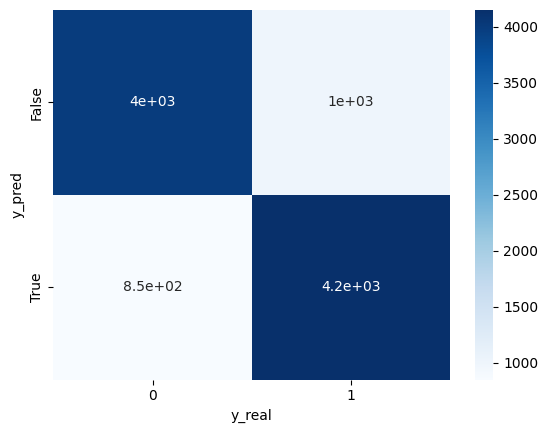

In [ ]:
resultados(grid_search)

In [ ]:
joblib.dump(grid_search,"/content/drive/My Drive/OrgaDeDatosRodriguez/TP_2/Models/naive.joblib")

['/content/drive/My Drive/OrgaDeDatosRodriguez/TP_2/Models/naive.joblib']

## Random Forest

Vamos a realizar una busqueda pequeña de hiperparametros ya que va a ser bastante lento con la cantidad de features que tiene para elegir

In [ ]:
model = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_2/Models/rfc_grid.joblib")

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'criterion': ['gini'],
    'max_depth': [15, None],
    'max_features': ['sqrt',None],
}
rfc = RandomForestClassifier(random_state=404, oob_score=True)
model = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='accuracy', cv=4, n_jobs=-1)

#Entrenamos el modelo
model.fit(x_train, y_train)

In [ ]:
print_grid_results(model)

Best: 0.814725 using {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
0.795675 (0.003737) with: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 100}
0.797125 (0.002628) with: {'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 200}
0.753975 (0.001810) with: {'criterion': 'gini', 'max_depth': 15, 'max_features': None, 'n_estimators': 100}
0.753550 (0.002405) with: {'criterion': 'gini', 'max_depth': 15, 'max_features': None, 'n_estimators': 200}
0.810475 (0.001879) with: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}
0.814725 (0.002629) with: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
0.783675 (0.001659) with: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'n_estimators': 100}
0.784225 (0.001771) with: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'n_estimators': 200}


El accuracy es: 0.8155

El f1 es: 0.8159233762346603

El recall es: 0.8140553454111089

La precision es: 0.8178


              precision    recall  f1-score   support

           0       0.81      0.82      0.82      4977
           1       0.82      0.81      0.82      5023

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



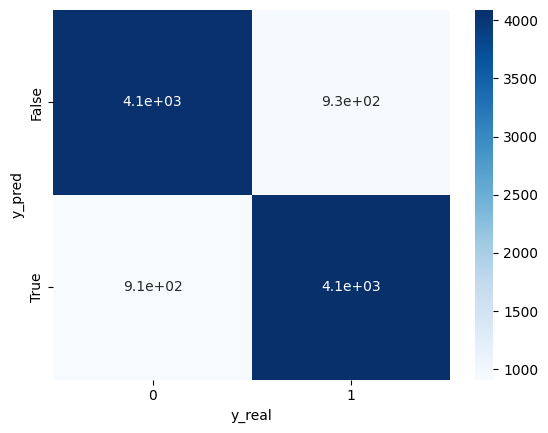

In [ ]:
resultados(model)

## XGBoost

In [ ]:
model = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_2/Models/xgb.joblib")

In [ ]:
model = make_pipeline(TfidfVectorizer(), XGBClassifier())
#Entrenamos el modelo
model.fit(x_train, y_train)

In [ ]:
predicted_categories = model.predict(x_test)
print("La precision es {}".format(accuracy_score(y_test,
predicted_categories)))

La precision es 0.8274


### XGBoost busqueda de hiperparametros

In [ ]:
model = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_2/Models/xgb_grid.joblib")

[22:03:15] WARNING: ../src/learner.cc:553: 
  If you are loading a serialized model (like pickle in Python, RDS in R) generated by
  older XGBoost, please export the model by calling `Booster.save_model` from that version
  first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.



In [ ]:
param_grid = {'learning_rate': [0.1,0.01,0.001],
              'n_estimators': [200,300],
              'subsample': [0.5,0.8,1],
              'colsample_bytree': [0.5,0.8,1],
              "max_depth": [3,5,10]
              }

xgb = XGBClassifier(random_state=404)
xgb_grid = GridSearchCV(estimator=xgb,param_grid=param_grid, cv=4, scoring='accuracy',n_jobs=-1)

model = make_pipeline(TfidfVectorizer(), xgb_grid)
#Entrenamos el modelo
model.fit(x_train, y_train)

In [ ]:
print_grid_results(model)

Best: 0.834925 using {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300, 'subsample': 0.5}
0.811775 (0.000895) with: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.5}
0.809550 (0.001798) with: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
0.807100 (0.003123) with: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1}
0.822350 (0.001074) with: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.5}
0.820800 (0.001625) with: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
0.819225 (0.001784) with: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1}
0.823850 (0.000865) with: {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 2

In [ ]:
model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.1,
 'max_depth': 10,
 'n_estimators': 300,
 'subsample': 0.5}

El accuracy es: 0.8364

El f1 es: 0.8388812290722868

El recall es: 0.826348467209934

La precision es: 0.8518


              precision    recall  f1-score   support

           0       0.82      0.85      0.83      4846
           1       0.85      0.83      0.84      5154

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



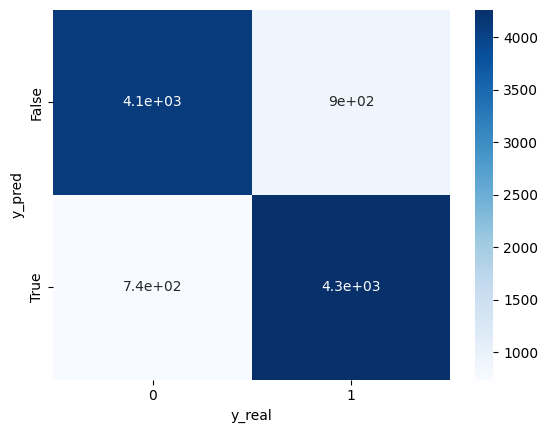

In [ ]:
resultados(model)

### Probando con GPU

In [ ]:
model = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_2/Models/xgb_grid_gpu_1.joblib")

[14:17:01] WARNING: ../src/gbm/gbtree.cc:415: 
  Loading from a raw memory buffer (like pickle in Python, RDS in R) on a CPU-only
  machine. Consider using `save_model/load_model` instead. See:

    https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html

  for more details about differences between saving model and serializing.  Changing `tree_method` to `hist`.
[14:17:01] WARNING: ../src/gbm/gbtree.cc:425: Changing updater from `grow_gpu_hist` to `grow_quantile_histmaker`.
[14:17:01] WARNING: ../src/learner.cc:339: No visible GPU is found, setting `gpu_id` to -1


In [ ]:
param_grid = {'learning_rate': [0.1,0.01,0.001],
              'n_estimators': [50,100,200],
              'subsample': [0.3, 0.5],
              'colsample_bytree': [0.3,0.5],
              "max_depth": [9,12,15]
              }


xgb = XGBClassifier(tree_method='gpu_hist', random_state=404)
model = GridSearchCV(estimator=xgb,param_grid=param_grid, cv=4, scoring='accuracy',n_jobs=-1)

model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
107 fits failed out of a total of 432.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1490, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 620, in inner_f
 

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=404, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.5],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [9, 12, 15],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.3, 0.5]},
             scoring='accuracy')

In [ ]:
model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 12,
 'n_estimators': 200,
 'subsample': 0.5}

In [ ]:
print_grid_results(model)

Best: 0.831250 using {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 12, 'n_estimators': 200, 'subsample': 0.5}
0.800375 (0.001043) with: {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 50, 'subsample': 0.3}
0.802325 (0.002640) with: {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 50, 'subsample': 0.5}
0.819600 (0.001151) with: {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100, 'subsample': 0.3}
0.817600 (0.002208) with: {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100, 'subsample': 0.5}
0.830800 (0.002305) with: {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200, 'subsample': 0.3}
0.829800 (0.001412) with: {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 200, 'subsample': 0.5}
0.808275 (0.001972) with: {'colsample_bytree': 0.3, 'learning_rate': 0.1, 'max_depth': 12, 'n_estimator

No funcionaron los de max depth = 15 por algun motivo

El accuracy es: 0.8345

El f1 es: 0.836833284038253

El recall es: 0.8251993000194439

La precision es: 0.8488


              precision    recall  f1-score   support

           0       0.82      0.84      0.83      4857
           1       0.85      0.83      0.84      5143

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



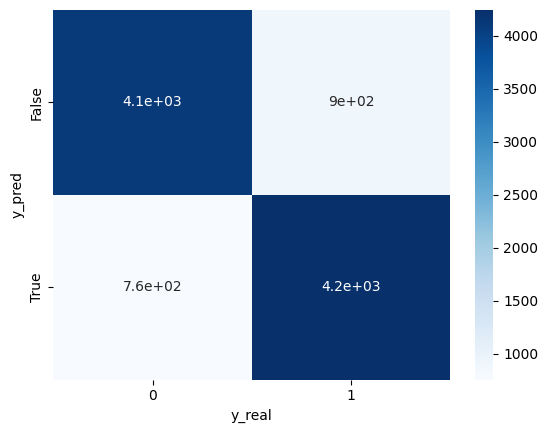

In [ ]:
resultados(model)

In [ ]:
joblib.dump(model, "/content/drive/My Drive/OrgaDeDatosRodriguez/TP_2/Models/xgb_grid_gpu_1.joblib")

['/content/drive/My Drive/OrgaDeDatosRodriguez/TP_2/Models/xgb_grid_gpu_1.joblib']

## Redes Neuronales

### Red Simple

In [ ]:
modelo= joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_2/Models/red_simple.joblib")

In [ ]:
d_in = x_train.shape[1]
modelo= keras.Sequential([
keras.layers.Dense(500,input_shape=(d_in,), activation='relu'),
keras.layers.Dense(1, activation='sigmoid')])

modelo.compile(
  loss='binary_crossentropy',
  # metricas para ir calculando en cada iteracion o batch
  metrics=['accuracy'],
)

red = modelo.fit(x_train,y_train,verbose=False)

313/313 [==============================] - 1s 3ms/step
El accuracy es: 0.8379

El f1 es: 0.8399328527698232

El recall es: 0.8295299395357909

La precision es: 0.8506


              precision    recall  f1-score   support

           0       0.83      0.85      0.84      4873
           1       0.85      0.83      0.84      5127

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



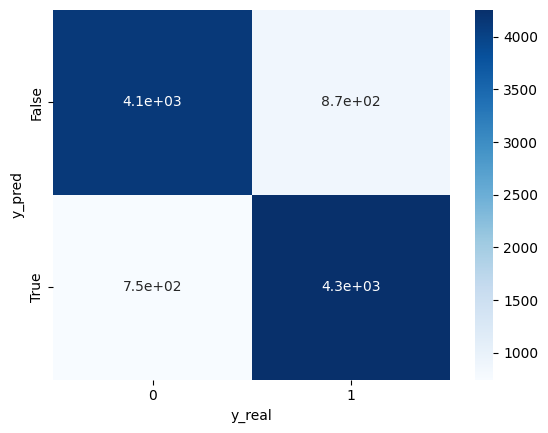

In [ ]:
resultados(modelo)

In [ ]:
joblib.dump(modelo, "/content/drive/My Drive/OrgaDeDatosRodriguez/TP_2/Models/red_simple.joblib")

['/content/drive/My Drive/OrgaDeDatosRodriguez/TP_2/Models/red_simple.joblib']

### Red Neuronal Grid

In [ ]:
d_in = x_train.shape[1]
def create_model():
    modelo= keras.Sequential([
    keras.layers.Dense((d_in/2),input_shape=(d_in,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])

    modelo.compile(
      optimizer="adam",
      loss='binary_crossentropy',
      # metricas para ir calculando en cada iteracion o batch
      metrics=['accuracy'],
    )

    return modelo

In [ ]:
grid_result =joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_2/Models/red_grid.joblib")

In [ ]:
param_grid = {
    'epochs': [20],
    'batch_size' : [16,32,64],
    'callbacks' : [tf.keras.callbacks.EarlyStopping("accuracy",patience=5)]
}

print(param_grid)
modelo_cv = KerasClassifier(build_fn=create_model)
grid = GridSearchCV(estimator=modelo_cv, param_grid=param_grid,n_jobs=-1,cv=4)
grid_result = grid.fit(x_train, y_train)

{'epochs': [20], 'batch_size': [16, 32, 64], 'callbacks': [<keras.callbacks.EarlyStopping object at 0x7f009455f520>]}


<ipython-input-51-958e1d0154d0>:8: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  modelo_cv = KerasClassifier(build_fn=create_model)


Epoch 1/20
625/625 [==============================] - 8s 11ms/step - loss: 0.3910 - accuracy: 0.8267
Epoch 2/20
625/625 [==============================] - 6s 10ms/step - loss: 0.3452 - accuracy: 0.8440
Epoch 3/20
625/625 [==============================] - 6s 10ms/step - loss: 0.3340 - accuracy: 0.8496
Epoch 4/20
625/625 [==============================] - 7s 11ms/step - loss: 0.3184 - accuracy: 0.8587
Epoch 5/20
625/625 [==============================] - 6s 9ms/step - loss: 0.2971 - accuracy: 0.8719
Epoch 6/20
625/625 [==============================] - 7s 12ms/step - loss: 0.2665 - accuracy: 0.8900
Epoch 7/20
625/625 [==============================] - 6s 9ms/step - loss: 0.2267 - accuracy: 0.9136
Epoch 8/20
625/625 [==============================] - 7s 11ms/step - loss: 0.1774 - accuracy: 0.9423
Epoch 9/20
625/625 [==============================] - 6s 9ms/step - loss: 0.1254 - accuracy: 0.9694
Epoch 10/20
625/625 [==============================] - 6s 9ms/step - loss: 0.0802 - accuracy: 

Podemos ver que a partir de 10 epochs la red empieza a overfittear

In [ ]:
print_grid_results(grid_result)

Best: 0.844475 using {'batch_size': 64, 'callbacks': <keras.callbacks.EarlyStopping object at 0x7f009455f520>, 'epochs': 20}
0.838450 (0.003434) with: {'batch_size': 16, 'callbacks': <keras.callbacks.EarlyStopping object at 0x7f009455f520>, 'epochs': 20}
0.843450 (0.001773) with: {'batch_size': 32, 'callbacks': <keras.callbacks.EarlyStopping object at 0x7f009455f520>, 'epochs': 20}
0.844475 (0.003010) with: {'batch_size': 64, 'callbacks': <keras.callbacks.EarlyStopping object at 0x7f009455f520>, 'epochs': 20}


In [ ]:
grid_result.predict(x_test)

313/313 [==============================] - 3s 8ms/step


array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

Tambien podemos ver que gridsearch da como resultado un true/false cuando con sigmoid deberia dar un numero entre 0 y 1 al predecir pero aca da true o false lo cual no nos deja optimizar nuestras predicciones

313/313 [==============================] - 1s 3ms/step
El accuracy es: 0.8461

El f1 es: 0.846606199541513

El recall es: 0.8438307172660441

La precision es: 0.8494


              precision    recall  f1-score   support

           0       0.84      0.85      0.85      4967
           1       0.85      0.84      0.85      5033

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



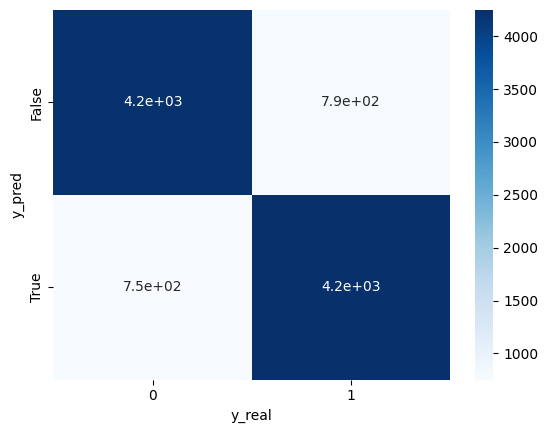

In [ ]:
#hacemos predicciones en el conjunto de prueba
resultados(grid_result)

In [ ]:
joblib.dump(grid_result, "/content/drive/My Drive/OrgaDeDatosRodriguez/TP_2/Models/red_grid.joblib")

['/content/drive/My Drive/OrgaDeDatosRodriguez/TP_2/Models/red_grid.joblib']

### Red Neuronal 1

In [ ]:
modelo = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_2/Models/red1.joblib")

In [ ]:
d_in = x_train.shape[1]
modelo= keras.Sequential([
keras.layers.Dense(d_in,input_shape=(d_in,), activation='relu'),
keras.layers.Dense(1, activation='sigmoid')])

modelo.compile(
  optimizer="adam",
  loss='binary_crossentropy',
  # metricas para ir calculando en cada iteracion o batch
  metrics=['accuracy'],
)

red=modelo.fit(x_train,y_train,epochs=5)

313/313 [==============================] - 1s 4ms/step
El accuracy es: 0.843

El f1 es: 0.845836606441477

El recall es: 0.8308256172839507

La precision es: 0.8614


              precision    recall  f1-score   support

           0       0.82      0.86      0.84      4816
           1       0.86      0.83      0.85      5184

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



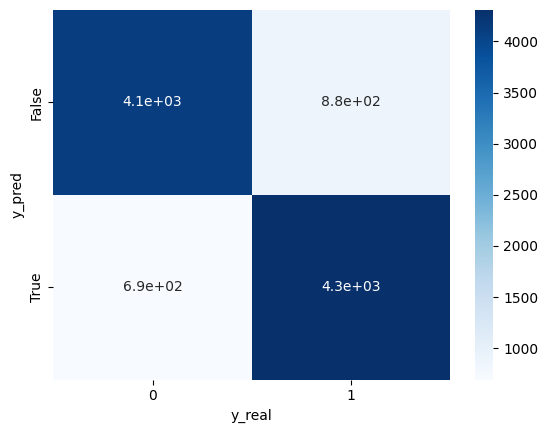

In [ ]:
#hacemos predicciones en el conjunto de prueba
resultados(modelo)

In [ ]:
joblib.dump(modelo, "/content/drive/My Drive/OrgaDeDatosRodriguez/TP_2/Models/red1.joblib")

['/content/drive/My Drive/OrgaDeDatosRodriguez/TP_2/Models/red1.joblib']

### Red Neuronal 2

In [ ]:
modelo = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_2/Models/red2.joblib")

In [ ]:
d_in = x_train.shape[1]
modelo= keras.Sequential([
keras.layers.Dense(d_in,input_shape=(d_in,), activation='relu'),
keras.layers.Dropout(0.2),
keras.layers.Dense(1, activation='sigmoid')])

modelo.compile(
  loss='binary_crossentropy',
  # metricas para ir calculando en cada iteracion o batch
  metrics=['accuracy'],
)

red=modelo.fit(x_train,y_train, epochs=10)

Epoch 1/10
1250/1250 [==============================] - 4s 2ms/step - loss: 0.3904 - accuracy: 0.8238
Epoch 2/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3435 - accuracy: 0.8473
Epoch 3/10
1250/1250 [==============================] - 3s 3ms/step - loss: 0.3290 - accuracy: 0.8531
Epoch 4/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3098 - accuracy: 0.8653
Epoch 5/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.2840 - accuracy: 0.8824
Epoch 6/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.2502 - accuracy: 0.9045
Epoch 7/10
1250/1250 [==============================] - 3s 3ms/step - loss: 0.2074 - accuracy: 0.9291
Epoch 8/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1579 - accuracy: 0.9527
Epoch 9/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.1119 - accuracy: 0.9705
Epoch 10/10
1250/1250 [==============================] - 3s 3ms/step - loss: 0.073

313/313 [==============================] - 2s 5ms/step
El accuracy es: 0.8406

El f1 es: 0.8428317886018537

El recall es: 0.8311940879035394

La precision es: 0.8548


              precision    recall  f1-score   support

           0       0.83      0.85      0.84      4858
           1       0.85      0.83      0.84      5142

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



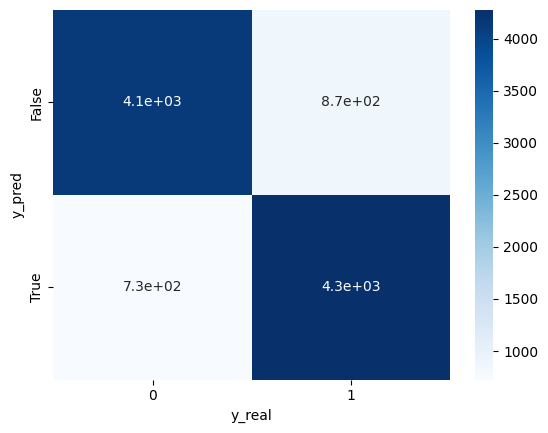

In [ ]:
resultados(modelo)

313/313 [==============================] - 2s 7ms/step
El accuracy es: 0.8425

El f1 es: 0.8423265592151367

El recall es: 0.8432551613549809

La precision es: 0.8414


              precision    recall  f1-score   support

           0       0.84      0.84      0.84      5011
           1       0.84      0.84      0.84      4989

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



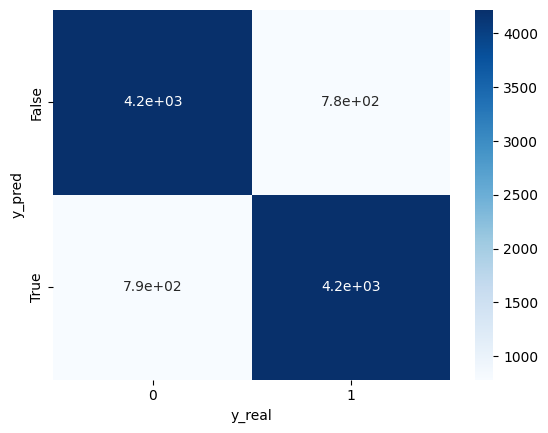

In [ ]:
resultados(modelo,0.45)

In [ ]:
joblib.dump(modelo, "/content/drive/My Drive/OrgaDeDatosRodriguez/TP_2/Models/red2.joblib")

['/content/drive/My Drive/OrgaDeDatosRodriguez/TP_2/Models/red2.joblib']

### Red Neuronal 3

In [ ]:
modelo = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_2/Models/red3.joblib")

In [ ]:
d_in = x_train.shape[1]
modelo= keras.Sequential([
keras.layers.Dropout(0.2, input_shape=(d_in,)),
keras.layers.Dense(d_in, activation='relu'),
keras.layers.Dense(1, activation='sigmoid')])

modelo.compile(
  loss='binary_crossentropy',
  # metricas para ir calculando en cada iteracion o batch
  metrics=['accuracy'],
)

red=modelo.fit(x_train,y_train,epochs=10)

Epoch 1/10
1250/1250 [==============================] - 6s 4ms/step - loss: 0.4226 - accuracy: 0.8064
Epoch 2/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3805 - accuracy: 0.8268
Epoch 3/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3706 - accuracy: 0.8316
Epoch 4/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3577 - accuracy: 0.8393
Epoch 5/10
1250/1250 [==============================] - 4s 4ms/step - loss: 0.3456 - accuracy: 0.8467
Epoch 6/10
1250/1250 [==============================] - 3s 3ms/step - loss: 0.3291 - accuracy: 0.8579
Epoch 7/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3075 - accuracy: 0.8715
Epoch 8/10
1250/1250 [==============================] - 3s 3ms/step - loss: 0.2832 - accuracy: 0.8883
Epoch 9/10
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2582 - accuracy: 0.9019
Epoch 10/10
1250/1250 [==============================] - 3s 2ms/step - loss: 0.231

313/313 [==============================] - 2s 5ms/step
El accuracy es: 0.8371

El f1 es: 0.8434105546476978

El recall es: 0.8119563205626503

La precision es: 0.8774


              precision    recall  f1-score   support

           0       0.80      0.87      0.83      4597
           1       0.88      0.81      0.84      5403

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



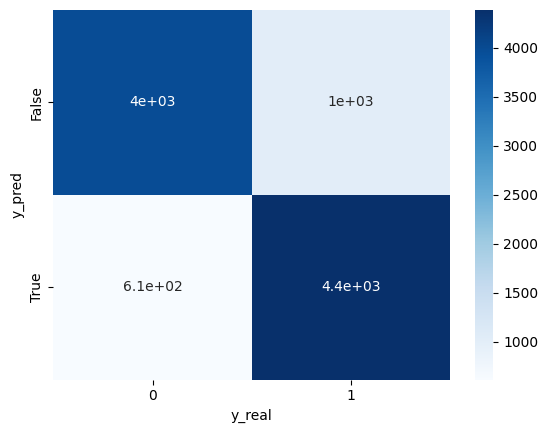

In [ ]:
resultados(modelo)

In [ ]:
joblib.dump(modelo, "/content/drive/My Drive/OrgaDeDatosRodriguez/TP_2/Models/red3.joblib")

['/content/drive/My Drive/OrgaDeDatosRodriguez/TP_2/Models/red3.joblib']

### Red Neuronal 4

In [ ]:
model = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_2/Models/red4.joblib")

In [ ]:
d_in = x_train.shape[1]
modelo= keras.Sequential([
keras.layers.Dense(d_in, activation='relu'),
keras.layers.Dense((d_in/2), activation='relu'),
keras.layers.Dense(1, activation='sigmoid')])

modelo.compile(
  loss='binary_crossentropy',
  # metricas para ir calculando en cada iteracion o batch
  metrics=['accuracy'],
)

red=modelo.fit(x_train,y_train,epochs=5)

Epoch 1/5
1250/1250 [==============================] - 5s 3ms/step - loss: 0.3839 - accuracy: 0.8245
Epoch 2/5
1250/1250 [==============================] - 3s 3ms/step - loss: 0.3334 - accuracy: 0.8545
Epoch 3/5
1250/1250 [==============================] - 3s 3ms/step - loss: 0.2922 - accuracy: 0.8757
Epoch 4/5
1250/1250 [==============================] - 3s 3ms/step - loss: 0.2121 - accuracy: 0.9190
Epoch 5/5
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1059 - accuracy: 0.9650


313/313 [==============================] - 2s 7ms/step
El accuracy es: 0.8371

El f1 es: 0.8434105546476978

El recall es: 0.8119563205626503

La precision es: 0.8774


              precision    recall  f1-score   support

           0       0.80      0.87      0.83      4597
           1       0.88      0.81      0.84      5403

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



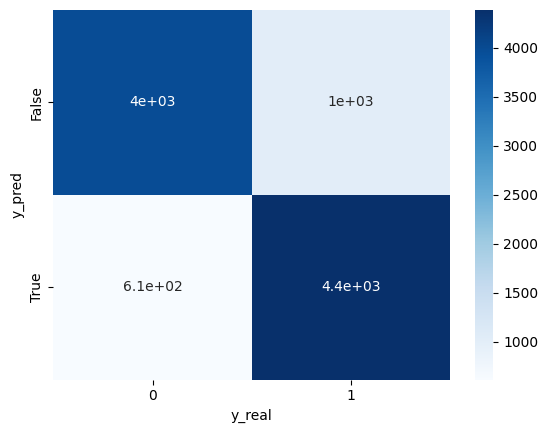

In [ ]:
resultados(modelo)

In [ ]:
joblib.dump(modelo, "/content/drive/My Drive/OrgaDeDatosRodriguez/TP_2/Models/red4.joblib")

['/content/drive/My Drive/OrgaDeDatosRodriguez/TP_2/Models/red4.joblib']

### Red Neuronal 5

In [ ]:
modelo = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_2/Models/red5.joblib")

In [ ]:
d_in = x_train.shape[1]
modelo= keras.Sequential([
keras.layers.Dense((d_in/2), activation='relu'),
keras.layers.Dense(1, activation='sigmoid')])

modelo.compile(
  optimizer="adam",
  loss='binary_crossentropy',
  # metricas para ir calculando en cada iteracion o batch
  metrics=['accuracy'],
)

red=modelo.fit(x_train,y_train,epochs=5)

Epoch 1/5
1250/1250 [==============================] - 5s 3ms/step - loss: 0.3570 - accuracy: 0.8403
Epoch 2/5
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2930 - accuracy: 0.8742
Epoch 3/5
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2370 - accuracy: 0.9043
Epoch 4/5
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1357 - accuracy: 0.9588
Epoch 5/5
1250/1250 [==============================] - 4s 3ms/step - loss: 0.0467 - accuracy: 0.9915


313/313 [==============================] - 1s 2ms/step
El accuracy es: 0.8368

El f1 es: 0.8475621147020362

El recall es: 0.7951279355064844

La precision es: 0.9074


              precision    recall  f1-score   support

           0       0.77      0.89      0.82      4294
           1       0.91      0.80      0.85      5706

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



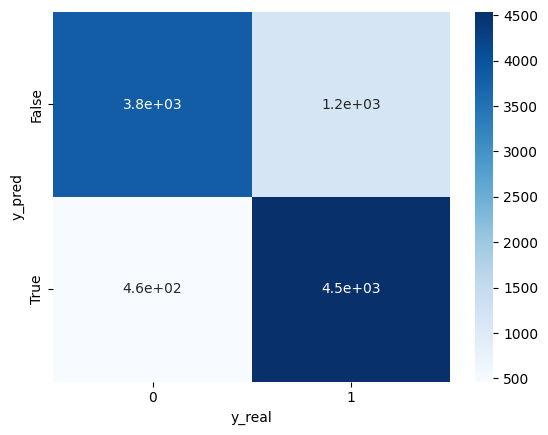

In [ ]:
resultados(modelo)

Subiendo el umbral

313/313 [==============================] - 1s 4ms/step
El accuracy es: 0.8413

El f1 es: 0.8488427469282788

El recall es: 0.8103291507546827

La precision es: 0.8912


              precision    recall  f1-score   support

           0       0.79      0.88      0.83      4501
           1       0.89      0.81      0.85      5499

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



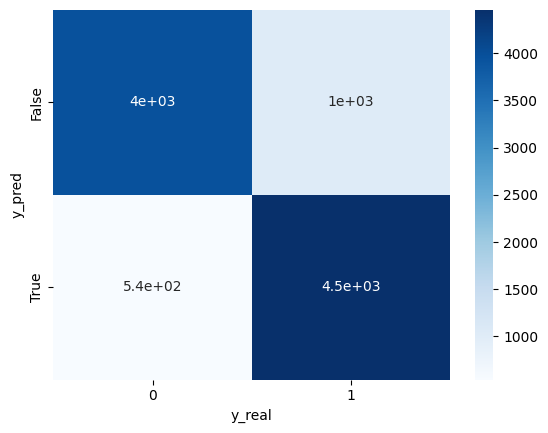

In [ ]:
resultados(modelo,0.45)

313/313 [==============================] - 1s 4ms/step
El accuracy es: 0.8425

El f1 es: 0.8483681524983152

El recall es: 0.8178949322442918

La precision es: 0.8812


              precision    recall  f1-score   support

           0       0.80      0.87      0.84      4613
           1       0.88      0.82      0.85      5387

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



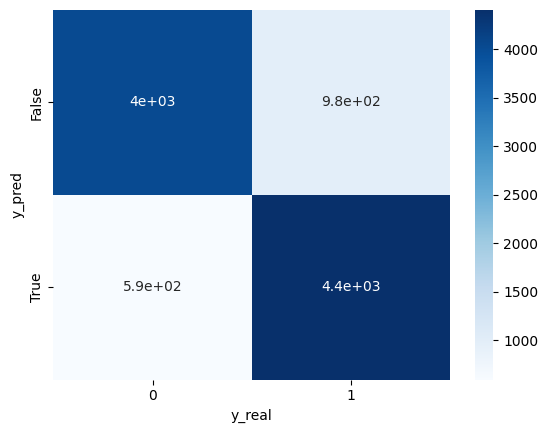

In [ ]:
resultados(modelo,0.5)

In [ ]:
joblib.dump(modelo, "/content/drive/My Drive/OrgaDeDatosRodriguez/TP_2/Models/red5_2500.joblib")

['/content/drive/My Drive/OrgaDeDatosRodriguez/TP_2/Models/red5_2500.joblib']

## Voting

In [ ]:
voting=joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_2/Models/voting.joblib")

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators = 200)
bayes = MultinomialNB()
xgb = XGBClassifier(n_estimators = 300, colsample_bytree = 0.8, learning_rate = 0.1, max_depth=10, subsample=0.5)

In [ ]:
#Creo ensemble de Votación
voting = VotingClassifier(estimators = [('rf',rf),('bayes', bayes),('xgb', xgb)], voting = 'hard')
#Entreno el ensemble
voting.fit(x_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(n_estimators=200)),
                             ('bayes', MultinomialNB()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=10,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...))])

El accuracy es: 0.8374

El f1 es: 0.8396765923880892

El recall es: 0.8280824581874757

La precision es: 0.8516


              precision    recall  f1-score   support

           0       0.82      0.85      0.84      4858
           1       0.85      0.83      0.84      5142

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



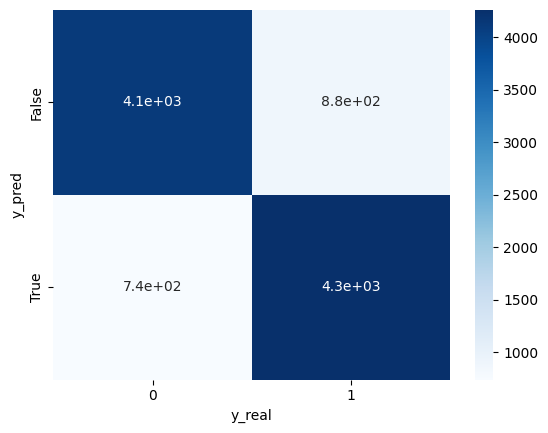

In [ ]:
resultados(voting)

In [ ]:
joblib.dump(voting, "/content/drive/My Drive/OrgaDeDatosRodriguez/TP_2/Models/voting.joblib")

## Prediccion

In [ ]:
# 2 min
X_TEST = vec.transform(df_test.review_es)
X_TEST = X_TEST.toarray()

In [ ]:
y_pred = modelo.predict(X_TEST)
y_pred

269/269 [==============================] - 1s 3ms/step


array([[0.01937523],
       [0.95269144],
       [0.00186175],
       ...,
       [0.49068055],
       [0.03686567],
       [0.0090069 ]], dtype=float32)

In [ ]:
# Solo para redes neuronales
y_pred = np.where(y_pred>0.45,1,0)
y_pred = y_pred.flatten()
y_pred

array([0, 1, 0, ..., 1, 0, 0])

In [ ]:
df_submission = pd.DataFrame({'id': df_test['ID'], 'Sentimiento': y_pred})
df_submission

,id,Sentimiento
0,60000,0
1,60001,1
2,60002,0
3,60003,1
4,60004,0
...,...,...
8594,68594,1
8595,68595,0
8596,68596,1
8597,68597,0


In [ ]:
df_submission.loc[df_submission['Sentimiento'] == 1, 'Sentimiento'] = 'positivo'
df_submission.loc[df_submission['Sentimiento'] == 0, 'Sentimiento'] = 'negativo'

In [ ]:
df_submission

,id,Sentimiento
0,60000,negativo
1,60001,positivo
2,60002,negativo
3,60003,positivo
4,60004,negativo
...,...,...
8594,68594,positivo
8595,68595,negativo
8596,68596,positivo
8597,68597,negativo


In [ ]:
df_submission.to_csv('/content/drive/My Drive/OrgaDeDatosRodriguez/TP_2/Submission/s50.csv', index=False)